In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.linalg import lu_factor,lu_solve

In [105]:
# 課題４

# 1000×1000の疎行列の作成
dimensions = 1000
A_4 = np.zeros((dimensions, dimensions))

# 行列の要素　1000*1000の要素の内、10000個を非０にする。
non_zero_elements = 10000
count = 0
# 行と列に対してアクセスするインデックスをランダムに生成する。
rows = np.random.randint(0, dimensions, 20000)
columns = np.random.randint(0, dimensions, 20000)
# １〜１０までの値を挿入する。
values = np.random.randint(1, 10, 20000)
for i in range(0, 20000):
    # アクセスしたインデックスの値が非０ならそのインデックスに代入
    if A_4[rows[i], columns[i]] == 0:
        A_4[rows[i], columns[i]] = values[i]
        count += 1
        # 0以外の値がnon_zero_elementsになったら終了
        if count == non_zero_elements:
            break

A_4

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [90]:
%timeit A_4 @ A_4

1.66 s ± 80.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [91]:
A_4_csr = csr_matrix(A_4)
%timeit A_4_csr * A_4_csr

738 µs ± 4.82 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [92]:
A_4 @ A_4

array([[ 0, 20,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0, 40,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [24,  0,  0, ..., 48,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [94]:

(A_4_csr * A_4_csr).toarray()

array([[ 0, 20,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0, 40,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [24,  0,  0, ..., 48,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [98]:
# 課題５
A_5 = np.array([[3,5,7,9],[3,2,1,0],[3,6,9,0],[3,7,7,7]])
B_5 = np.array([4,5,6,7])

In [ ]:
# 逆行列を使う
inv_A_5 = np.linalg.inv(A_5)
inv_A_5 @ B_5

In [99]:
# solveを使う
np.linalg.solve(A_5,B_5)

array([ 0.97222222,  1.30555556, -0.52777778, -0.19444444])

In [109]:
# LU分解を使う
A_5_lu,A_5_p = lu_factor(A_5)
lu_solve((A_5_lu,A_5_p),B_5)

array([ 0.97222222,  1.30555556, -0.52777778, -0.19444444])

In [169]:
# 課題６
# 以下のサイコロクラスを例にとってseed関数を用いて再現性を担保したはずのインスタンスで異なる結果が出るのはなぜ？
class Dice:
    def __init__(self):
        np.random.seed(0)
        self.sum_ = 0
        # 検証のため追加
        self.roll = 0

    def throw(self):
        # 検証のため追加
        self.roll = np.random.randint(1,7)

        self.sum_ += self.roll

    def get_sum(self):
        return self.sum_

    # 検証のため追加
    def get_random_state(self):
        return np.random.get_state()[2]

In [155]:
d1 = Dice()
for _ in range(10):
    d1.throw()
print(d1.get_sum())
d2 = Dice()
for _ in range(10):
    d2.throw()
print(d2.get_sum())

39
39


In [156]:
d1 = Dice()
d2 = Dice()
for _ in range(10):
    d1.throw()
    d2.throw()
print(d1.get_sum())
print(d2.get_sum())


34
33


### A.seed関数がグローバルな値を参照、変更を行っているから

In [178]:
d1 = Dice()
d2 = Dice()
for _ in range(10):

    d1.throw()
    print("ダイス1->乱数生成器の状態:{},サイコロの目{}".format(d1.get_random_state(),d1.roll))

    d2.throw()
    print("ダイス2->乱数生成器の状態:{},サイコロの目{}".format(d2.get_random_state(),d2.roll))




ダイス1->乱数生成器の状態:1,サイコロの目5
ダイス2->乱数生成器の状態:3,サイコロの目6
ダイス1->乱数生成器の状態:4,サイコロの目1
ダイス2->乱数生成器の状態:5,サイコロの目4
ダイス1->乱数生成器の状態:6,サイコロの目4
ダイス2->乱数生成器の状態:7,サイコロの目4
ダイス1->乱数生成器の状態:9,サイコロの目2
ダイス2->乱数生成器の状態:10,サイコロの目4
ダイス1->乱数生成器の状態:11,サイコロの目6
ダイス2->乱数生成器の状態:12,サイコロの目3
ダイス1->乱数生成器の状態:13,サイコロの目5
ダイス2->乱数生成器の状態:16,サイコロの目1
ダイス1->乱数生成器の状態:17,サイコロの目1
ダイス2->乱数生成器の状態:18,サイコロの目5
ダイス1->乱数生成器の状態:19,サイコロの目3
ダイス2->乱数生成器の状態:20,サイコロの目2
ダイス1->乱数生成器の状態:25,サイコロの目1
ダイス2->乱数生成器の状態:26,サイコロの目2
ダイス1->乱数生成器の状態:27,サイコロの目6
ダイス2->乱数生成器の状態:28,サイコロの目2


In [179]:


d1 = Dice()
for _ in range(10):
    d1.throw()
    print("ダイス1->乱数生成器の状態:{},サイコロの目{}".format(d1.get_random_state(),d1.roll))

d2 = Dice()
for _ in range(10):
    d2.throw()
    print("ダイス2->乱数生成器の状態:{},サイコロの目{}".format(d2.get_random_state(),d2.roll))


ダイス1->乱数生成器の状態:1,サイコロの目5
ダイス1->乱数生成器の状態:3,サイコロの目6
ダイス1->乱数生成器の状態:4,サイコロの目1
ダイス1->乱数生成器の状態:5,サイコロの目4
ダイス1->乱数生成器の状態:6,サイコロの目4
ダイス1->乱数生成器の状態:7,サイコロの目4
ダイス1->乱数生成器の状態:9,サイコロの目2
ダイス1->乱数生成器の状態:10,サイコロの目4
ダイス1->乱数生成器の状態:11,サイコロの目6
ダイス1->乱数生成器の状態:12,サイコロの目3
ダイス2->乱数生成器の状態:1,サイコロの目5
ダイス2->乱数生成器の状態:3,サイコロの目6
ダイス2->乱数生成器の状態:4,サイコロの目1
ダイス2->乱数生成器の状態:5,サイコロの目4
ダイス2->乱数生成器の状態:6,サイコロの目4
ダイス2->乱数生成器の状態:7,サイコロの目4
ダイス2->乱数生成器の状態:9,サイコロの目2
ダイス2->乱数生成器の状態:10,サイコロの目4
ダイス2->乱数生成器の状態:11,サイコロの目6
ダイス2->乱数生成器の状態:12,サイコロの目3


In [390]:
from scipy import optimize

# :TODO 解けなかった。輪講で教えてもらう

# x = [t1,t2,t3,t4,z1,z2,z3,z4]
c = np.array([1,1,1,1,0,0,0,0],dtype=np.float64)
A = np.array([[0,0,0,0,2,4,8,3],[0,0,0,0,7,0,-1,1],[0,0,0,0,0,6,5,7]],dtype=np.float64)
b = np.array([1,2,8],dtype=np.float64)

G = np.array([[-1,0,0,0,-1,0,0,0],[0,-1,0,0,0,-1,0,0],[0,0,-1,0,0,0,-1,0],[0,0,0,-1,0,0,0,-1],[-1,0,0,0,1,0,0,0],[0,-1,0,0,0,1,0,0],[0,0,-1,0,0,0,1,0],[0,0,0,-1,0,0,0,1],[-1,0,0,0,0,0,0,0],[0,-1,0,0,0,0,0,0],[0,0,-1,0,0,0,0,0],[0,0,0,-1,0,0,0,0]],dtype=np.float64)
h = np.array([0,0,0,0,0,0,0,0,0,0,0,0],dtype=np.float64)


sol = optimize.linprog(c,A_ub=G,b_ub=h,A_eq=A,b_eq=b)

In [391]:
sol

     con: array([-5.02550963, -1.57047176, -3.14094352])
     fun: 3656431154628.1045
 message: 'The algorithm terminated successfully and determined that the problem is infeasible.'
     nit: 6
   slack: array([8.69631712e+11, 1.00723213e+12, 9.02464767e+11, 8.77102545e+11,
       8.69631712e+11, 1.00723213e+12, 9.02464767e+11, 8.77102545e+11,
       8.69631712e+11, 1.00723213e+12, 9.02464767e+11, 8.77102545e+11])
  status: 2
 success: False
       x: array([8.69631712e+11, 1.00723213e+12, 9.02464767e+11, 8.77102545e+11,
       3.19617021e-01, 1.80878585e-01, 6.03003096e-02, 1.39345292e+00])

In [377]:

w_trajectories = []

w_init = np.array([10,10])
a = 0.1
class GD:
    def __init__(self,a,w_init,_t_max):
        self.a = a
        self.w = np.array(w_init)
        self.w_trajectories = []
        self._t_max = _t_max

    def calc(self):

        for _ in range(self._t_max):
            grad = np.array([-np.sin(self.w[0])-self.w[0]*np.cos(self.w[0]),-2 * np.sin(self.w[1]) - 0.4])
            self.w = self.w - a * grad
            self.w_trajectories.append(self.w)




In [378]:
hoge = GD(a,w_init,100)

In [382]:
hoge.calc()

In [386]:
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable
_cmap = plt.cm.jet


def f(x,y):
    return -x * np.sin(x) + 2 * np.cos(y) -0.4 * y

def w_value_2d_heatmap(f,w_store,_t_max,k):
    w_star = [0,0]
    grid_x_min = min(w_store.T[0].min(), w_star[0]) - k
    grid_x_max = max(w_store.T[0].max(), w_star[0]) + k
    grid_y_min = min(w_store.T[1].min(), w_star[1]) - k
    grid_y_max = max(w_store.T[1].max(), w_star[1]) + k
    xvals = np.arange(grid_x_min, grid_x_max, 0.1)
    yvals = np.arange(grid_y_min, grid_y_max, 0.1)
    X, Y = np.meshgrid(xvals, yvals)
    Z = f(X,Y)

    fig, axes = plt.subplots(1, 1, figsize=(6, 6))
    axes.pcolor(X, Y, Z, cmap=plt.cm.rainbow)

    # wの軌跡
    axes.plot(w_store.T[0], w_store.T[1], c="k", alpha=0.2, linewidth=1)
    c = np.linspace(0, _t_max, len(w_store))
    axes.scatter(w_store.T[0], w_store.T[1], c=c, cmap=plt.cm.hot, linewidths=0.01, alpha=1, s=10)

    # 始点(黄色)、終点（緑）、真値（赤）
    axes.plot(*w_store[0], 'ks', markersize=5, label="start")
    axes.plot(*w_store[-1], 'gs', markersize=5, label="finish")


    axpos = axes.get_position()
    cbar_ax = fig.add_axes([0.9, axpos.y0, 0.03, axpos.height])
    norm = colors.Normalize(vmin=Z.min(), vmax=Z.max())
    mappable = ScalarMappable(cmap=plt.cm.rainbow, norm=norm)
    mappable._A = []
    fig.colorbar(mappable, cax=cbar_ax)

    # 余白の調整
    plt.subplots_adjust(right=0.85)
    plt.subplots_adjust(wspace=0.1)

    plt.show()

<ipython-input-386-afece545e9e6>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axes.pcolor(X, Y, Z, cmap=plt.cm.rainbow)


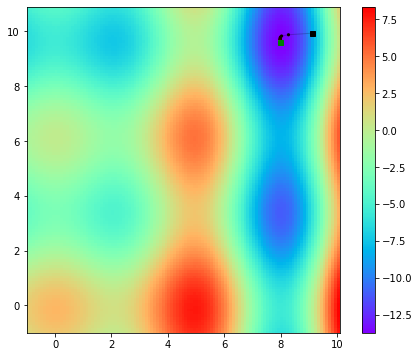

In [387]:

w_value_2d_heatmap(f,np.array(hoge.w_trajectories),100,1)

-0.2013579207903308

<ipython-input-386-afece545e9e6>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axes.pcolor(X, Y, Z, cmap=plt.cm.rainbow)


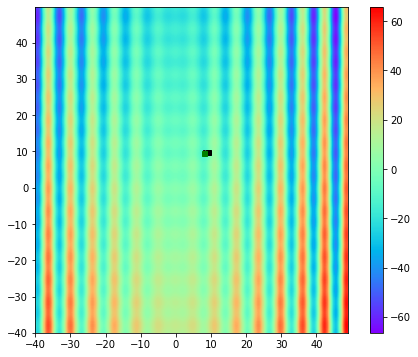

In [389]:
w_value_2d_heatmap(f,np.array(hoge.w_trajectories),100,40)